In [1]:
# import packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [2]:
#load the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape #check the shape

(60000, 28, 28)

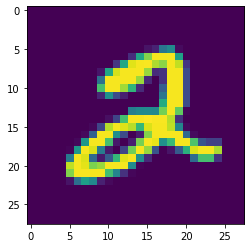

In [4]:
#plotting the image 
plt.imshow(x_train[5])
plt.show()

In [5]:
#checking the shape of y_train
y_train.shape

(60000,)

In [6]:
x_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
# flattening of our matrix to a vector of input_shape 784
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [8]:
#flattening of our test_data
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [9]:
x_train.shape

(60000, 784)

In [10]:
y_train[5]

2

In [11]:
#converting it into a one-hot encoding form
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
#normalization of the x_train and x_test : Now to pixel intensity values will change from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [14]:
#defining the type of model
model = Sequential()

In [15]:
#building the model
model.add(Dense(64,activation='relu',input_shape = (784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
#getting the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compile the model by giving the loss function and the type of optimizer you need
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [18]:
#train the data
history = model.fit(x_train,y_train,batch_size = 200, epochs = 10)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.8709 - accuracy: 0.7532
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2140 - accuracy: 0.9393
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1596 - accuracy: 0.9530
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1278 - accuracy: 0.9631
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1115 - accuracy: 0.9674
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0924 - accuracy: 0.9734
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9753
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0766 - accuracy: 0.9772
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9814

In [19]:
#evaluating the model using test data
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 986us/step - loss: 0.0971 - accuracy: 0.9729


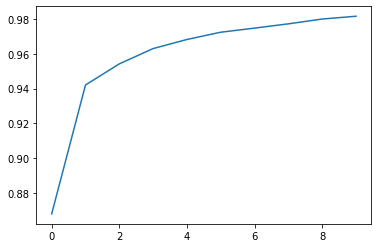

In [20]:
#plotting the accuracy
plt.plot(history.history['accuracy'])
plt.show()

In [21]:
#predicting the values
predicted_values = model.predict(x_test[:10])
print(np.argmax(predicted_values,axis = 1))

[7 2 1 0 4 1 4 9 5 9]


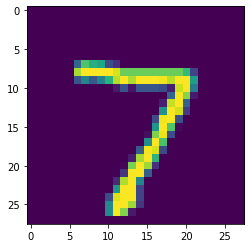

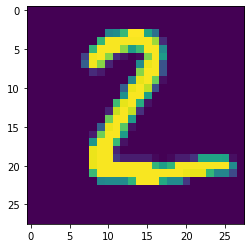

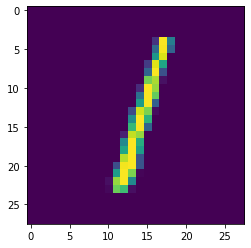

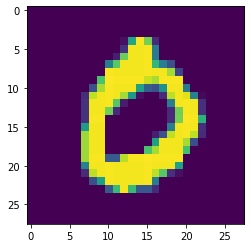

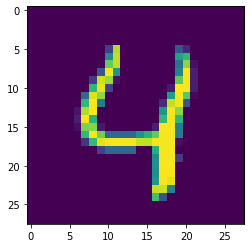

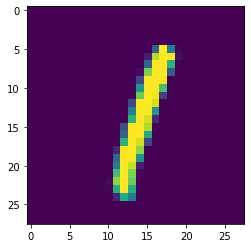

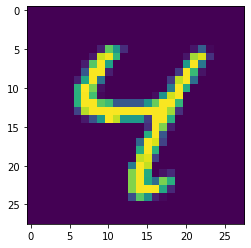

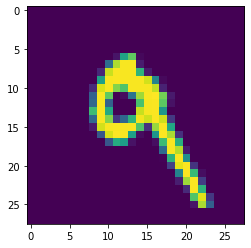

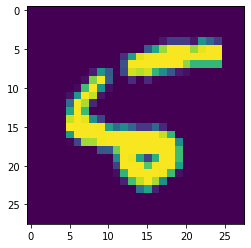

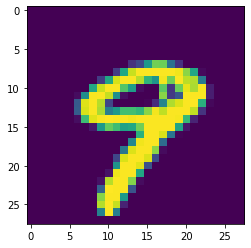

In [22]:
#plotting the predicted values to check the prediction
for i in range(0,10):
  image = x_test[i]
  image = np.array(image,dtype = 'float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()